In [13]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [14]:
df =pd.read_csv('beacons.csv')
df.shape

(1916, 10)

In [15]:
X =  df.iloc[:1700,3:]
y =   df.iloc[:1700,1:3]
X1 =  df.iloc[1700:,3:]
y1 =   df.iloc[1700:,1:3]

In [16]:
y['x']

0       5.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
1695    5.4
1696    5.4
1697    5.4
1698    5.4
1699    5.4
Name: x, Length: 1700, dtype: float64

In [17]:
xg_reg = xgb.XGBRegressor( 
    objective ='reg:linear',
    colsample_bytree = 0.3, 
    alpha = 10, 
    max_depth=10,
    n_estimators=1000,
    learning_rate=1.0
)
xg_reg.fit(X, y['x'])

C:\Users\poulr\Anaconda32\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\poulr\Anaconda32\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[22:07:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=1.0, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [18]:
xg_reg1 = xgb.XGBRegressor( 
    objective ='reg:linear',
    colsample_bytree = 0.3, 
    alpha = 10, 
    max_depth=10,
    n_estimators=1000,
    learning_rate=1.0
)
xg_reg1.fit(X, y['y'])

C:\Users\poulr\Anaconda32\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\poulr\Anaconda32\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[22:07:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=1.0, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [19]:
predictions = xg_reg.predict(X1)
prediction= xg_reg1.predict(X1)

predictions = pd.DataFrame(predictions)
predictions = predictions.rename(columns={0:'a'})
prediction = pd.DataFrame(prediction)
prediction = prediction.rename(columns={0:'b'})

y1 =y1.reset_index()
y1['a'] = predictions['a']
y1['b'] = prediction['b']

y1['distance']=np.sqrt((y1['x']-y1['a'])**2+(y1['y']-y1['b'])**2)
y1['distance'].mean()

4.359236830342893

In [20]:
from sklearn.model_selection import KFold 
scores = []
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    xg_reg = xgb.XGBRegressor( 
    objective ='reg:linear',
    colsample_bytree = 0.3, 
    alpha = 10, 
    max_depth=10,
    n_estimators=1000,
    learning_rate=1.0
    )
    xg_reg.fit(X, y['x'])
    xg_reg1 = xgb.XGBRegressor( 
    objective ='reg:linear',
    colsample_bytree = 0.3, 
    alpha = 10, 
    max_depth=10,
    n_estimators=1000,
    learning_rate=1.0
    )
    xg_reg1.fit(X, y['y'])

    predictions = xg_reg.predict(X1)
    prediction= xg_reg1.predict(X1)

    predictions = pd.DataFrame(predictions)
    predictions = predictions.rename(columns={0:'a'})
    prediction = pd.DataFrame(prediction)
    prediction = prediction.rename(columns={0:'b'})

    y1['a'] = predictions['a']
    y1['b'] = prediction['b']

    y1['distance']=np.sqrt((y1['x']-y1['a'])**2+(y1['y']-y1['b'])**2)
    mean = y1['distance'].mean()
    scores.append(mean)

C:\Users\poulr\Anaconda32\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\poulr\Anaconda32\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\poulr\Anaconda32\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Train Index:  [ 170  171  172 ... 1697 1698 1699] 

Test Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169]
[22:07:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:07:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objectiv

[22:07:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train Index:  [   0    1    2 ... 1697 1698 1699] 

Test Index:  [1360 1361 1362 1363 1364 1365 1366 1367 1368 1369 1370 1371 1372 1373
 1374 1375 1376 1377 1378 1379 1380 1381 1382 1383 1384 1385 1386 1387
 1388 1389 1390 1391 1392 1393 1394 1395 1396 1397 1398 1399 1400 1401
 1402 1403 1404 1405 1406 1407 1408 1409 1410 1411 1412 1413 1414 1415
 1416 1417 1418 1419 1420 1421 1422 1423 1424 1425 1426 1427 1428 1429
 1430 1431 1432 1433 1434 1435 1436 1437 1438 1439 1440 1441 1442 1443
 1444 1445 1446 1447 1448 1449 1450 1451 1452 1453 1454 1455 1456 1457
 1458 1459 1460 1461 1462 1463 1464 1465 1466 1467 1468 1469 1470 1471
 1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 

In [21]:
mean

4.359236830342893

In [22]:
scores

[4.359236830342893,
 4.359236830342893,
 4.359236830342893,
 4.359236830342893,
 4.359236830342893,
 4.359236830342893,
 4.359236830342893,
 4.359236830342893,
 4.359236830342893,
 4.359236830342893]

Text(0.5,0,'XG Boosting')

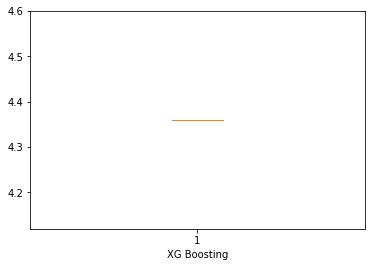

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(scores)
plt.xlabel('XG Boosting')